In [13]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.environ['NNTOOL_DIR'])

from quantization.symmetric.kernels.dsp_preprocessing import Rad2_FFT_DIF_Fix16

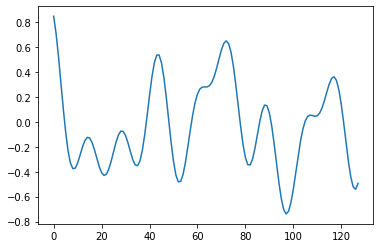

In [23]:
in_data_q16= np.array([3475, 2913, 2161, 1307, 445, -329, -944, -1351, -1536, -1520, -1351, -1096, -828, -615, -506, -526, -670, -909, -1193, -1464, -1667, -1759, -1720, -1553, -1288, -974, -669, -431, -303, -310, -448, -686, -971, -1236, -1411, -1439, -1282, -933, -417, 210, 871, 1477, 1943, 2197, 2200, 1943, 1455, 799, 59, -669, -1295, -1744, -1969, -1955, -1722, -1317, -810, -272, 224, 630, 915, 1079, 1144, 1151, 1151, 1190, 1302, 1499, 1769, 2076, 2367, 2583, 2667, 2576, 2292, 1828, 1222, 540, -138, -732, -1171, -1404, -1414, -1217, -862, -423, 14, 364, 553, 535, 297, -139, -720, -1370, -2001, -2528, -2883, -3024, -2939, -2651, -2207, -1674, -1126, -629, -232, 37, 181, 225, 210, 187, 204, 293, 465, 709, 988, 1249, 1433, 1485, 1365, 1059, 581, -21, -679, -1307, -1819, -2138, -2212, -2022, -1582, -945, -187, 599, 1318, 1889, 2254, 2387, 2298, 2029, 1645, 1225, 845, 568, 435, 456, 613, 861, 1142, 1393, 1556, 1593, 1490, 1258, 932, 564, 211, -73, -254, -316, -273, -160, -34, 42, 13, -166, -514, -1015, -1629, -2284, -2899, -3384, -3665, -3690, -3437, -2925, -2204, -1353, -469, 351, 1022, 1480, 1696, 1675, 1454, 1094, 671, 262, -69, -282, -361, -318, -189, -25, 118, 196, 179, 59, -142, -387, -620, -783, -826, -716, -447, -39, 457, 979, 1450, 1799, 1972, 1940, 1709, 1313, 818, 305, -140, -439, -536, -407, -61, 456, 1073, 1702, 2250, 2638, 2808, 2733, 2423, 1916, 1276, 581, -93, -681, -1138, -1448, -1621, -1688, -1699, -1702, -1742, -1843, -2011, -2223, -2438, -2604, -2664, -2571, -2300, -1849, -1250, -558, 151, 793, 1290, 1578, 1626, 1433, 1034, 494, -101, -660, -1097, -1347, -1375, -1181, -797, -286, 270, 791, 1200, 1442, 1492, 1356, 1070, 691, 289, -67, -323, -443, -420, -271, -38, 226, 467, 638, 711, 681, 571, 421, 286, 225, 285, 493, 851, 1329, 1871, 2401, 2836, 3095, 3119, 2876, 2368, 1635, 746, -207, -1126, -1916, -2503, -2844, -2929, -2784, -2464, -2043, -1603, -1216, -940, -803, -804, -916, -1091, -1270, -1396, -1424, -1330, -1116, -808, -453, -108, 170, 337, 368, 265, 55, -210, -468, -653, -706, -593, -307, 129, 663, 1221, 1718, 2075, 2228, 2141, 1813, 1278, 601, -128, -818, -1376, -1731, -1842, -1699, -1331, -793, -162, 480, 1058, 1512, 1810, 1947, 1947, 1852, 1715, 1588, 1511, 1505, 1565, 1664, 1758, 1793, 1718, 1495, 1110, 575, -70, -763, -1428, -1986, -2371, -2538, -2474, -2198, -1761, -1238, -718, -287, -15, 51, -96, -437, -915, -1453, -1962, -2359, -2579, -2580, -2357, -1936, -1371, -733, -102, 452, 875, 1139, 1244, 1217, 1102, 954, 827, 760, 773, 862, 999, 1139, 1227, 1215, 1064, 763, 326, -205, -765, -1276, -1657, -1841, -1783, -1472, -931, -216, 590, 1394, 2098, 2622, 2911, 2943, 2734, 2330, 1803, 1237, 714, 301, 43, -47, 10, 175, 384, 575, 687, 679, 536, 266, -94, -494, -876, -1185, -1381, -1447, -1393, -1250, -1071, -916, -842, -890, -1081, -1404, -1820, -2266, -2665, -2938, -3017, -2857, -2446, -1808, -998, -98, 793, 1580, 2180, 2534, 2619, 2447, 2065, 1542, 963, 411, -41, -350, -495, -487, -363, -176, 15, 160, 223, 192, 78, -83, -243, -347, -348, -215, 58, 453, 923, 1405, 1826, 2121, 2237, 2148, 1862, 1415, 871, 310, -182, -531, -683, -617, -344, 88, 608, 1127, 1555, 1816, 1856, 1655, 1226, 616, -103, -851, -1544, -2114, -2513, -2724, -2759, -2654, -2461, -2239, -2037, -1891, -1815, -1795, -1800, -1784, -1696, -1493, -1152, -672, -80, 569, 1208, 1757, 2145, 2318, 2248, 1943, 1443, 817, 152, -458, -929, -1197, -1230, -1030, -636, -112, 457, 986, 1398, 1636, 1676, 1525, 1220, 822, 403, 34, -225, -341, -303, -131, 134, 436, 717, 925, 1028, 1015, 903, 730, 546, 408, 363, 439, 641, 944, 1298, 1635, 1880, 1961, 1827, 1454, 851, 63, -837, -1757, -2598, -3270, -3703, -3859, -3736, -3370, -2823, -2179, -1527, -946, -498, -216, -101, -127, -243, -389, -503, -536, -460, -273, 2, 325, 639, 890, 1032, 1039, 913, 678, 383, 88, -139, -247, -198, 15, 370, 818, 1289, 1701, 1982, 2070, 1936, 1582, 1044, 389, -296, -918, -1390, -1646, -1649, -1400, -933, -311, 382, 1058, 1637, 2057, 2283, 2313, 2173, 1910, 1583, 1253, 969, 759, 628, 557, 509, 435, 288, 33, -345, -838, -1408, -1997, -2535, -2950, -3181, -3191, -2971, -2544, -1966, -1313, -674, -136, 232, 387, 321, 58, -343, -806, -1241, -1566, -1714, -1650, -1369, -901, -304, 345, 967, 1488, 1852, 2032, 2030, 1874, 1615, 1314, 1029, 808, 679, 644, 681, 750, 802, 786, 667, 428, 81, -338, -772, -1150, -1400, -1464, -1304, -917, -330, 397, 1180, 1925, 2538, 2942, 3087, 2960, 2580, 2005, 1311, 590, -71, -601, -953, -1113, -1099, -956, -746, -539, -396, -361, -455, -670, -973, -1314, -1634, -1878, -2004, -1993, -1851, -1610, -1320, -1039, -825, -721, -750, -904, -1150, -1431, -1676, -1812, -1778, -1535, -1075, -424, 358, 1192, 1983, 2637, 3077, 3253, 3150, 2789, 2224, 1535, 811, 144, -391, -747, -903, -874, -698, -435, -148, 102, 274, 348, 328, 244, 141, 70, 76, 192, 425, 758, 1151, 1543, 1868, 2064, 2083, 1903, 1533, 1010, 399, -218, -762, -1157, -1353, -1329, -1101, -715, -245, 222, 599, 812, 810, 579, 136, -466, -1155, -1843, -2446, -2893, -3140, -3170, -3001, -2675, -2250, -1793, -1364, -1006, -740, -563, -448, -352, -228, -33, 258, 650, 1121, 1626, 2102, 2480, 2696, 2704, 2484, 2049, 1442, 736, 18, -619, -1094, -1348, -1351, -1112, -674, -107, 500, 1059, 1491, 1738, 1777, 1615, 1292, 871, 427, 34, -247, -379, -351, -184, 80, 383, 664, 867, 956, 918, 765, 534, 274, 40, -116, -165, -97, 68, 289, 504, 645, 649, 470, 89, -481, -1196, -1981, -2747, -3400, -3856, -4052, -3961, -3589, -2981, -2208, -1362, -537, 179, 726, 1068, 1205, 1167, 1008, 794, 592, 459, 428, 508, 681, 908, 1137, 1313, 1392, 1348, 1176, 902, 570, 239, -28, -178, -176, -15, 286, 679, 1097, 1464, 1706, 1770, 1626, 1279, 766, 154, -473, -1026, -1421, -1597, -1526, -1212, -697, -49, 642, 1288, 1804, 2129, 2233, 2115, 1808, 1366, 858, 351, -95, -445, -686, -831, -914, -980, -1077, -1242, -1493, -1827, -2213, -2601, -2928, -3132, -3157, -2973, -2577, -1996, -1288, -530, 189, 787, 1195, 1374, 1318, 1057, 651, 179, -265, -603, -767, -722, -467, -34, 517, 1109, 1658, 2090, 2351, 2414, 2283, 1992, 1595, 1158, 748, 417, 198, 98, 99, 164, 241, 281, 245, 110, -118, -411, -719, -980, -1130, -1116, -909, -508, 57, 727, 1419, 2042, 2508, 2748, 2719, 2415, 1867, 1136, 308, -520, -1258, -1831, -2194, -2331, -2266, -2045, -1736, -1414, -1146, -981, -943, -1029, -1208, -1431, -1641, -1779, -1806, -1698, -1462, -1125, -738, -358, -43, 161, 231, 171, 8, -202, -396, -504, -470, -257, 140, 697, 1357, 2040, 2658, 3124, 3368, 3348, 3056, 2522, 1807, 998, 189, -526, -1073, -1403, -1501, -1384, -1100, -714, -300, 76, 363, 534, 589, 552, 465, 379, 342, 387, 527, 752, 1024, 1291, 1493, 1573, 1487, 1217, 774, 197, -449, -1088, -1637, -2026, -2207, -2162, -1909, -1496, -998, -500, -90, 159, 202, 25, -348, -867, -1453, -2019, -2481, -2769, -2842, -2688, -2329, -1813, -1209, -588, -18, 449, 788, 1000, 1107, 1152, 1184, 1248, 1378, 1584, 1851, 2144, 2410, 2587, 2620, 2470, 2122, 1591, 924, 191, -522, -1128, -1549, -1732, -1656, -1336, -820, -185, 478, 1077, 1531, 1783, 1810, 1622, 1262, 797, 305, -135, -461, -634, -641, -501, -259, 25, 288, 473, 540, 473, 284, 6, -308, -604, -830, -949, -948, -841, -664, -473, -331, -296, -412, -695, -1133, -1683, -2274, -2824, -3245, -3461, -3419, -3100, -2521, -1732, -814, 136, 1024, 1759, 2281, 2557, 2592, 2423, 2110, 1728, 1351, 1044, 847, 775, 814, 928, 1066, 1173, 1203, 1126, 937, 654, 319, -11, -280, -435, -442, -293, -8, 366, 766, 1117, 1351, 1414, 1279, 953, 471, -100, -679, -1179, -1522, -1652, -1543, -1207, -688, -59, 589, 1167, 1593, 1807, 1784, 1529, 1083, 507, -122, -728, -1247, -1635, -1876, -1979, -1979, -1921, -1858, -1832, -1868, -1971, -2119, -2271, -2374, -2371, -2215, -1881, -1367, -705, 48, 819, 1522, 2076, 2421, 2522, 2377, 2022, 1521, 958, 424, 4, -238, -267, -84, 277, 755, 1269, 1735, 2078, 2245, 2210, 1980, 1592, 1105, 589, 113, -263, -505, -604, -576, -460, -308, -174, -102, -120, -231, -412, -622, -805, -903, -868, -673, -318, 168, 730, 1289, 1761, 2066, 2143, 1959, 1514, 848, 29, -851, -1696, -2411, -2924, -3191, -3204, -2987, -2596, -2107, -1599, -1148, -807, -607, -546, -597, -712, -832, -899, -868, -717, -447, -84, 323, 720, 1047, 1260, 1333, 1266, 1087, 845, 603, 428, 375, 478, 746, 1154, 1649, 2157, 2594, 2880, 2953, 2777, 2351, 1712, 925, 78, -730, -1409, -1886, -2118, -2094, -1841, -1412, -884, -336, 155, 534, 767, 851, 809, 684, 529, 397, 326, 337, 424, 560, 700, 788, 774, 617, 303, -157, -726, -1341, -1927, -2406, -2712, -2801, -2661, -2310, -1801, -1209, -622, -125, 209, 338, 249, -33, -454, -936, -1391, -1736, -1904, -1855, -1583, -1116, -506, 171, 840, 1428, 1879, 2166, 2287, 2269, 2155, 2000, 1857, 1764, 1742, 1785, 1866, 1940, 1954, 1857, 1614, 1213, 669, 25, -651, -1281, -1783, -2087, -2149, -1954, -1524, -915, -206, 506, 1130, 1585, 1815, 1801, 1557, 1131, 594, 30, -478, -866, -1088, -1134, -1023, -797, -519, -256, -67, 5, -54, -240, -516, -833, -1132, -1360, -1478, -1468, -1340, -1128, -881, -662, -526, -515, -649, -918, -1281, -1677, -2027, -2253, -2286, -2083, -1630, -953, -106, 826, 1747, 2560, 3180, 3548, 3642, 3471, 3083, 2545, 1943, 1359, 863, 504, 298, 236, 280, 380, 476, 519, 474, 329, 99, -181, -460, -683, -801, -781, -614, -321, 55, 452, 800, 1031, 1095, 967, 654, 192, -353, -904, -1374, -1690, -1799, -1680, -1346, -845, -250, 348, 861, 1208, 1336, 1224, 884, 362, -272, -937, -1549, -2042, -2367, -2508, -2477, -2309, -2057, -1778, -1523, -1327, -1202, -1138, -1100, -1042, -915, -676, -301, 210, 830, 1506, 2166, 2733, 3133, 3312, 3243, 2932, 2418, 1770, 1075, 426, -92, -416, -515, -389, -77, 355, 827, 1253, 1555, 1680, 1604, 1335, 913, 398, -133, -611, -975, -1187, -1237, -1142, -945, -698, -462, -286, -203, -222, -328, -483, -637, -734, -728, -591, -321, 57, 493, 916, 1251, 1424, 1384, 1104, 593, -103, -916, -1751, -2510, -3104, -3464, -3550, -3363, -2936, -2333, -1636, -935, -308, 181, 503, 654, 663, 578, 462, 375, 365, 462, 666, 956, 1288, 1606, 1856, 1991, 1985, 1838, 1575, 1243, 905, 623, 455, 434, 570, 840, 1195, 1566, 1875, 2045, 2021, 1772, 1302, 649, -118, -913, -1640, -2210, -2557, -2642, -2465, -2058, -1485, -829, -176, 390, 811, 1051, 1108, 1005, 791, 523, 261, 53, -74, -116, -95, -48, -25, -74, -232, -516, -915, -1395, -1898, -2354, -2691, -2850, -2792, -2509, -2024, -1393, -692, -9, 569, 974, 1163, 1127, 891, 513, 72, -343, -652, -787, -714, -427, 41, 634, 1276, 1883, 2383, 2721, 2866, 2822, 2617, 2300, 1934, 1576, 1275, 1058, 929, 866, 830, 772, 645, 413, 62, -396, -925, -1465, -1942, -2285, -2434, -2350, -2027, -1494, -808, -54, 673, 1283, 1696, 1864, 1770, 1437, 918, 290, -355, -934, -1375, -1633, -1695, -1581, -1336, -1025, -718, -476, -346, -349, -477, -699, -963, -1212, -1390, -1456, -1391, -1201, -916, -587, -271, -27, 103, 97, -36, -265, -532, -766, -894, -855, -611, -154, 489, 1261, 2079, 2849, 3476, 3883, 4019, 3869, 3454, 2827, 2069, 1269, 520, -105, -556, -812, -887, -819, -665, -489, -348, -284, -315, -435, -612, -802, -952, -1014, -956, -769, -470, -99, 284, 614, 827, 876, 738, 421, -37, -574, -1111, -1565, -1865, -1962, -1835, -1502, -1011, -436, 133, 611, 919, 1010, 865, 503, -24, -644, -1270, -1816, -2213, -2416, -2408, -2206, -1851, -1402, -926, -481, -110, 163, 346, 464, 560, 681, 869, 1150, 1529, 1982, 2464, 2912, 3257, 3433, 3396, 3124, 2631, 1959, 1181, 385, -336, -902, -1250, -1353, -1217, -884, -425, 75, 528, 856, 1004, 948, 698, 295, -197, -702, -1146, -1466, -1624, -1610, -1443, -1166, -837, -518, -265, -115, -82, -155, -298, -463, -596, -648, -590, -414, -140, 187, 507, 750, 850, 763, 467, -23, -665, -1385, -2092, -2693, -3103, -3261, -3137, -2738, -2108, -1318, -460, 372, 1094, 1642, 1982, 2114, 2068, 1897, 1669, 1450, 1295, 1238, 1289, 1428, 1616, 1800, 1927, 1950, 1843, 1604, 1256, 844, 428, 70, -173, -270, -209, -11, 278, 592, 857, 1001, 971, 738, 310, -276, -952, -1634, -2229, -2655, -2850, -2784, -2463, -1927, -1246, -508, 194, 778, 1181, 1372, 1348, 1141, 805, 406, 10, -324, -564, -696, -735, -716, -686, -692, -772, -947, -1211, -1534, -1868, -2148, -2311, -2303, -2093, -1676, -1081, -363, 399, 1119, 1713, 2115, 2284, 2215, 1938, 1512, 1019, 548, 182, -13, -4, 210, 600, 1102, 1640, 2130, 2498, 2688, 2676, 2464, 2088, 1601, 1071, 565, 135, -183, -382, -480, -512, -528, -576, -695, -904, -1199, -1549, -1904, -2199, -2372, -2369, -2159, -1742, -1148, -437, 307, 995, 1536, 1860, 1924, 1720, 1276, 655, -59, -773, -1398, -1858, -2110, -2142, -1974, -1658, -1260, -856, -514, -282, -187, -222, -360, -549, -731, -850, -863, -748, -509, -176, 203, 572, 872, 1058, 1108, 1023, 834, 594, 368, 224, 220, 392, 745, 1253, 1859, 2485, 3041, 3440, 3613, 3516, 3144, 2525, 1722, 821, -81, -892, -1535, -1960, -2152, -2127, -1930, -1626, -1286, -977, -749, -627, -610, -675, -776, -864, -891, -822, -645, -373, -40, 297, 580, 750, 762, 597, 264, -198, -730, -1252, -1685, -1960, -2030, -1879, -1526, -1019, -433, 143, 623, 935, 1032, 900, 562, 71, -494, -1047, -1503, -1791, -1870, -1727, -1383, -887, -305, 288, 829, 1265, 1571, 1746, 1815, 1818, 1806, 1825, 1905, 2057, 2268, 2501, 2702, 2811, 2771, 2545, 2117, 1503, 749, -72, -876, -1574, -2087, -2360, -2373, -2138, -1702, -1142, -546, -7, 395, 606, 602, 395, 29, -429, -903, -1313, -1596, -1712, -1653, -1436, -1106, -726, -359, -65, 114, 164, 93, -65, -263, -445, -560, -574, -474, -275, -14, 251, 460, 552, 485, 241, -166, -694, -1273, -1817, -2239, -2463, -2435, -2136, -1580, -819, 67, 985, 1836, 2533, 3014, 3247, 3238, 3021, 2659, 2225, 1795, 1431, 1175, 1040, 1013, 1058, 1123, 1155, 1106, 948, 674, 306, -115, -533, -888, -1128, -1217, -1147, -936, -629, -290, 8, 199, 229, 72, -265, -745, -1303, -1856, -2318, -2610, -2677, -2496, -2076, -1464, -735, 21, 712, 1255, 1588, 1685, 1550, 1221, 760, 240, -262, -685, -984, -1144, -1176, -1113, -1004, -898, -839, -852, -940, -1083, -1237, -1349, -1361, -1228, -920, -439, 187, 903, 1632, 2291, 2800, 3097, 3149, 2954, 2547, 1992, 1373, 782, 302, -1, -94, 22, 314, 720, 1159, 1548, 1813, 1899, 1782, 1470, 1000, 432, -163, -714, -1162, -1472, -1631, -1656, -1585, -1468, -1358, -1301, -1322, -1423, -1584, -1760, -1897, -1938, -1834, -1560, -1115, -531, 135, 805, 1394, 1818, 2016, 1953, 1629, 1080, 375, -397, -1141, -1763, -2191, -2381, -2327, -2053, -1617, -1091, -557, -89, 257, 456, 507, 438, 299, 150, 48, 39, 147, 372, 686, 1043, 1387, 1661, 1819, 1836, 1712, 1475, 1174, 872, 635, 519, 558, 759, 1098, 1522, 1957, 2320, 2531, 2526, 2273, 1770, 1054, 192, -726, -1604, -2348, -2884, -3168, -3190, -2973, -2572, -2060, -1519, -1021, -626, -364, -239, -229, -290, -370, -418, -395, -282, -86, 164, 422, 632, 739, 705, 511, 166, -290, -799, -1286, -1675, -1900, -1918, -1716, -1315, -766, -144, 462, 968, 1302, 1421, 1315, 1006, 553, 33, -464, -856, -1074, -1079, -863, -453, 97, 716, 1325, 1852, 2243, 2468, 2528, 2447, 2270, 2052, 1843, 1684, 1594, 1569, 1580, 1583, 1524, 1355, 1040, 567, -47, -759, -1502, -2194, -2753, -3109, -3215, -3057, -2656, -2066, -1366, -651, -15, 463, 730, 763, 578, 221, -234, -708, -1119, -1401, -1511, -1441, -1208, -860, -460, -75, 232, 420, 469, 387, 205, -25, -247, -409, -471, -417, -255, -20, 237, 458, 586, 579, 419, 117, -285, -727, -1128, -1408, -1499, -1356, -967, -352, 429, 1297, 2154, 2902, 3457, 3762, 3791, 3557, 3104, 2503, 1836, 1187, 626, 200, -71, -201, -224, -192, -162, -185, -294, -501, -790, -1125, -1454, -1720, -1875, -1884, -1738, -1455, -1080, -673, -306, -43, 63, -10, -258, -645, -1106, -1563, -1931, -2138, -2133, -1894, -1439, -814, -97, 622, 1252, 1712, 1947, 1933, 1684, 1244, 680, 76, -487, -941, -1240, -1366, -1330, -1168, -932, -679, -458, -303, -227, -216, -236, -241, -179, -7, 299, 742, 1293, 1899, 2490, 2989, 3322, 3435, 3300, 2924, 2346, 1635, 876, 164, -416, -804, -965, -903, -653, -282, 129, 495, 740, 810, 683, 368, -95, -645, -1206, -1706, -2082, -2297, -2341, -2230, -2005, -1720, -1435, -1198, -1045, -984, -1001, -1058, -1106, -1092, -969, -713, -320, 181, 738, 1281, 1730, 2013, 2076, 1891, 1467, 846, 99, -681, -1398, -1961, -2301, -2380, -2197, -1784, -1205, -542, 117, 694, 1129, 1389, 1475, 1415, 1259, 1069, 908, 823, 846, 977, 1194, 1455, 1705, 1886, 1955, 1884, 1673, 1348, 955, 556, 215, -12, -91, -13, 199, 498, 815, 1071, 1191, 1120, 828, 319, -366, -1162, -1978, -2718, -3293, -3635, -3707, -3505, -3065, -2448, -1736, -1018, -375, 129, 463, 621, 626, 525, 375, 234, 147, 141, 219, 357, 517, 646, 696, 628, 425, 96, -324, -779, -1199, -1513, -1660, -1603, -1331, -869, -270, 389, 1022, 1544, 1886, 2007, 1898, 1586, 1131, 610, 115, -272, -486, -489, -278, 117, 640, 1212, 1754, 2189, 2464, 2549, 2446, 2184, 1812, 1390, 979, 625, 358, 179, 68, -12, -112, -278, -546, -928, -1413, -1961, -2513, -2996, -3336, -3473, -3368, -3015, -2440, -1705, -890, -91, 597, 1099, 1363, 1373, 1149, 745, 236, -290, -747, -1068, -1208, -1157, -934, -587, -182, 210, 527, 721, 770, 683, 490, 241, -3, -189, -275, -240, -90, 145, 417, 667, 841, 896, 812, 595, 283, -68, -386, -597, -640, -475, -95, 473, 1174, 1923, 2626, 3190, 3537, 3615, 3409, 2941, 2263, 1454, 607, -188, -858, -1351, -1648, -1761, -1728, -1605, -1457, -1338, -1292, -1334, -1459, -1634, -1814, -1945, -1979, -1884, -1651, -1295, -859, -400, 12, 317, 465, 433, 226, -116, -535, -953, -1288, -1470, -1451, -1215, -777, -189, 474, 1124, 1670, 2037, 2173, 2061, 1720, 1200, 576, -65, -639, -1074, -1325, -1375, -1237, -954, -583, -189, 170, 453, 638, 733, 763, 772, 808, 914, 1116, 1419, 1801, 2214, 2598, 2881, 3000, 2908, 2585, 2042, 1324, 502, -335, -1098, -1700, -2084, -2220, -2114, -1809, -1373, -891, -453, -134, 9, -43, -284, -669, -1136, -1607, -2008, -2276, -2373, -2289, -2043, -1680, -1257, -837, -478, -216, -69, -24, -49, -97, -115, -56, 107, 383, 750, 1161, 1554, 1859, 2010, 1961, 1691, 1212, 571, -160, -891, -1528, -1984, -2198, -2139, -1812, -1261, -556, 214, 955, 1585, 2039, 2286, 2326, 2190, 1933, 1621, 1322, 1092, 964, 948, 1024, 1153, 1283, 1359, 1335, 1184, 904, 518, 70, -378, -766, -1039, -1161, -1122, -943, -669, -365, -107, 34, 7, -214, -625, -1187, -1832, -2474, -3020, -3389, -3519, -3379, -2976, -2351, -1574, -734, 75, 770, 1288, 1593, 1685, 1593, 1368, 1076, 782, 541, 388, 333, 360, 434, 508, 532, 470, 300, 29, -314, -679, -1003, -1220, -1276, -1138, -801, -291, 336, 1004, 1629, 2125, 2429, 2502, 2338, 1969, 1455, 878, 327, -113, -379, -435, -280, 53, 505, 996, 1444, 1773, 1929, 1885, 1644, 1242, 733, 183, -341, -784, -1114, -1321, -1423, -1454, -1464, -1500, -1602, -1787, -2051, -2364, -2672, -2914, -3025, -2953, -2667, -2165, -1480, -672, 175, 969, 1621, 2057, 2234, 2142, 1810, 1296, 684, 65, -469, -849, -1031, -1003, -788, -436, -16, 397, 737, 953, 1020, 945, 756, 505, 252, 54, -44, -20, 121, 355, 634, 901, 1100, 1187, 1140, 962, 684, 359, 54, -163, -234, -125, 170, 626, 1187, 1771, 2290, 2657, 2801, 2679, 2285, 1648, 830, -83, -995, -1812, -2458, -2883, -3070, -3036, -2826, -2503, -2139, -1800, -1535, -1369, -1303, -1309, -1345, -1361, -1308, -1154, -885, -514, -80, 364, 756, 1036, 1158, 1102, 876, 515, 81, -350, -700, -902, -909, -706, -312, 222, 823, 1401, 1871, 2159, 2219, 2040, 1642, 1083, 439, -199, -747, -1132, -1312, -1273, -1034, -643, -166, 326, 769, 1111, 1328, 1419, 1409, 1341, 1264, 1222, 1249, 1355, 1524, 1721, 1892, 1974, 1914, 1669, 1227, 602, -158, -984, -1790, -2486, -2993, -3259, -3259, -3008, -2552, -1966, -1340, -765, -320, -60, -9, -154, -452, -836, -1229, -1551, -1742, -1761, -1600, -1278, -842, -355, 118, 517, 799, 947, 967, 892, 770, 655, 595, 626, 759, 978, 1245, 1506, 1695, 1756, 1644, 1345, 871, 267, -395, -1031, -1551, -1878, -1956, -1764, -1317, -664, 116, 931, 1683, 2285, 2677, 2828, 2742, 2457, 2032, 1543, 1064, 658, 366, 202, 150, 176, 227, 248, 193, 31, -240, -605, -1020, -1428, -1771, -1994, -2064, -1971, -1732, -1393, -1018, -677, -439, -357, -455, -727, -1137, -1618, -2089, -2463, -2663, -2633, -2352, -1830, -1115, -281, 577, 1369, 2007, 2433, 2615, 2558, 2298, 1895, 1423, 957, 560, 272, 111, 65, 101, 171, 225, 221, 135, -35, -268, -520, -735, -855, -831, -635, -265, 251, 859, 1485, 2045, 2460, 2669, 2640, 2372, 1899, 1285, 615, -19, -535, -868, -985, -886, -606, -207, 229, 619, 889, 984, 879, 581, 129, -418, -990, -1514, -1933, -2208, -2330, -2313, -2195, -2026, -1860, -1741, -1695, -1723, -1806, -1899, -1949, -1898, -1700, -1328, -783, -99, 666, 1435, 2118, 2633, 2917, 2932, 2678, 2191, 1538, 805, 90, -514, -938, -1138, -1105, -867, -477, -10, 453, 841, 1100, 1203, 1150, 974, 724, 461, 245, 122, 119, 235, 444, 703, 955, 1143, 1223, 1170, 984, 692, 345, 6, -261, -401, -378, -187, 146, 571, 1011, 1384, 1607, 1620, 1386, 906, 215, -618, -1506, -2351, -3059, -3555, -3796, -3770, -3503, -3046, -2475, -1869, -1302, -833, -493, -285, -188, -159, -147, -100, 18, 227, 518, 861, 1209, 1503, 1689, 1726, 1595, 1305, 891, 415, -51, -431, -660, -695, -523, -164, 330, 886, 1416, 1836, 2077, 2094, 1880, 1460, 892, 255, -358, -865, -1196, -1309, -1197, -884, -424, 111, 645, 1106, 1439, 1615, 1634, 1521, 1320, 1085, 867, 705, 619, 602, 626, 646, 609, 465, 177, -265, -847, -1524, -2229, -2881, -3398, -3708, -3767, -3557, -3102, -2453, -1691, -910, -202, 350, 694, 809, 709, 441, 74, -308, -627, -818, -839, -681, -366, 59, 531, 980, 1344, 1579, 1663, 1605, 1437, 1206, 971, 785, 686, 690, 790, 954, 1129, 1259, 1287, 1173, 902, 485, -36, -596, -1115, -1511, -1715, -1680, -1392, -873, -179, 608, 1394, 2080, 2583, 2844, 2838, 2579, 2109, 1498, 829, 185, -364, -774, -1025, -1129, -1123, -1058, -993, -978, -1048, -1212, -1458, -1746, -2028, -2244, -2346, -2300, -2096, -1752, -1313, -839, -400, -63, 120, 126, -38, -340, -715, -1084, -1366, -1487, -1398, -1079, -547, 147, 929, 1705, 2383, 2882, 3144, 3148, 2903, 2455, 1872, 1235, 627, 116, -249, -454, -507, -442, -310, -167, -61, -25, -68, -177, -316, -437, -487, -422, -215, 133, 599, 1130, 1654, 2096, 2382, 2457, 2295, 1900, 1312, 598, -153, -853, -1415, -1779, -1910, -1814, -1527, -1116, -662, -251, 39, 158, 81, -182, -593, -1088, -1593, -2034, -2350, -2502, -2481, -2302, -2006, -1648, -1287, -973, -739, -597, -531, -506, -473, -379, -179, 151, 613, 1178, 1792, 2384, 2873, 3187, 3269, 3093, 2666, 2029, 1255, 434, -333, -960, -1374, -1537, -1447, -1136, -665, -116, 425, 882, 1195, 1335, 1301, 1125, 858, 564, 305, 131, 72, 132, 288, 498, 705, 856, 903, 821, 607, 288, -90, -469, -783, -978, -1020, -901, -643, -296, 70, 377, 551, 534, 297, -154, -784, -1521, -2277, -2956, -3469, -3747, -3753, -3484, -2974, -2285, -1499, -707, 12, 594, 1005, 1240, 1321, 1294, 1215, 1140, 1116, 1166, 1292, 1472, 1663, 1815, 1877, 1809, 1596, 1244, 789, 287, -191, -574, -801, -833, -659, -303, 183, 726, 1239, 1639, 1859, 1858, 1631, 1205, 641, 18, -571, -1044, -1335, -1404, -1249, -899, -411, 136, 664, 1095, 1375, 1474, 1393, 1159, 821, 440, 74, -229, -444, -569, -622, -645, -687, -793, -1001, -1322, -1746, -2233, -2723, -3143, -3420, -3492, -3321, -2901, -2258, -1453, -568, 301, 1063, 1637, 1973, 2055, 1901, 1563, 1118, 651, 248, -24, -123, -38, 208, 569, 978, 1364, 1662, 1826, 1834, 1693, 1435, 1112, 782, 501, 313, 239, 275, 391, 541, 669, 721, 655, 453, 125, -293, -744, -1152, -1445, -1559, -1456, -1126, -596, 76, 808, 1505, 2072, 2432, 2532, 2356, 1924, 1289, 529, -264, -1004, -1614, -2046, -2280, -2329, -2232, -2045, -1831, -1648, -1537, -1516, -1577, -1688, -1804, -1870, -1840, -1679, -1380, -958, -454, 70, 551, 923, 1138, 1170, 1027, 743, 381, 15, -272, -414, -362, -101, 352, 947, 1607, 2242, 2763, 3092, 3179, 3008, 2597, 1997, 1283, 543, -136, -683, -1051, -1221, -1206, -1046, -797, -521, -277, -104, -22, -23, -79, -146, -176, -125, 33, 304, 664, 1068, 1453, 1748, 1888, 1825, 1540, 1042, 375, -391, -1169, -1867, -2404, -2720, -2786, -2611, -2236, -1731, -1181, -675, -290, -80, -68, -244, -566, -969, -1377, -1715, -1920, -1954, -1807, -1499, -1073, -588, -109, 308, 625, 826, 920, 939, 930, 944, 1028, 1209, 1493, 1858, 2258, 2629, 2901, 3009, 2905, 2569, 2016, 1289, 464, -369, -1114, -1684, -2016, -2078, -1874, -1445, -861, -208, 420, 943, 1298, 1455, 1413, 1207, 889, 529, 193, -61, -202, -221, -136, 12, 171, 285, 306, 208, -13, -335, -715, -1094, -1410, -1609, -1656, -1543, -1290, -943, -568, -240, -29, 11, -145, -492, -991, -1574, -2155, -2642, -2951, -3022, -2824, -2363, -1682, -850, 43, 904, 1648, 2211, 2557, 2686, 2624, 2424, 2148, 1863, 1623, 1461, 1387, 1385, 1420, 1443, 1408, 1275, 1025, 665, 224, -245, -680, -1013, -1188, -1171, -956, -567, -58, 495, 1009, 1404, 1613, 1599, 1360, ])
in_data = np.array([0.848657, 0.711346, 0.527794, 0.319074, 0.108742, -0.080641, -0.230779, -0.330162, -0.375452, -0.371525, -0.330190, -0.267841, -0.202445, -0.150405, -0.123821, -0.128616, -0.163824, -0.222128, -0.291527, -0.357811, -0.407378, -0.429874, -0.420196, -0.379467, -0.314842, -0.238161, -0.163696, -0.105421, -0.074276, -0.075953, -0.109607, -0.167744, -0.237340, -0.302012, -0.344884, -0.351648, -0.313298, -0.228040, -0.102029, 0.051228, 0.212722, 0.360776, 0.474396, 0.536602, 0.537174, 0.474376, 0.355348, 0.195119, 0.014371, -0.163644, -0.316570, -0.426199, -0.481006, -0.477566, -0.420641, -0.321966, -0.197956, -0.066775, 0.054754, 0.153824, 0.223501, 0.263417, 0.279256, 0.281121, 0.281135, 0.290708, 0.318000, 0.366042, 0.431874, 0.506855, 0.578113, 0.630875, 0.651261, 0.629035, 0.559816, 0.446321, 0.298405, 0.131836, -0.034000, -0.179106, -0.286085, -0.343012, -0.345486, -0.297479, -0.210831, -0.103457, 0.003459, 0.088822, 0.135001, 0.130642, 0.072488, -0.034119, -0.176106, -0.334779, -0.488800, -0.617542, -0.704270, -0.738612, -0.717953, -0.647510, -0.539148, -0.409128, -0.275233, -0.153756, -0.056890, 0.009045, 0.044241, 0.054833, 0.051238, 0.045743, 0.049782, 0.071430, 0.113566, 0.173065, 0.241177, 0.305033, 0.350031, 0.362673, 0.333338, 0.258494, 0.141928, -0.005269, -0.165983, -0.319465, -0.444425, -0.522348, -0.540475, -0.493932, -0.386663, -0.230981, -0.045795, 0.146202, 0.321925, 0.461340, 0.550375, 0.582857, 0.561155, 0.495445, 0.401751, 0.299098, 0.206275, 0.138745, 0.106234, 0.111367, 0.149582, 0.210279, 0.278988, 0.340153, 0.380018, 0.389107, 0.363856, 0.307131, 0.227528, 0.137625, 0.051483, -0.018117, -0.062197, -0.077408, -0.066802, -0.039392, -0.008577, 0.010340, 0.003062, -0.040842, -0.125653, -0.248228, -0.397967, -0.558099, -0.708061, -0.826636, -0.895299, -0.901262, -0.839658, -0.714536, -0.538449, -0.330731, -0.114707, 0.085722, 0.249521, 0.361496, 0.414284, 0.409076, 0.354978, 0.267130, 0.163953, 0.063985, -0.017160, -0.069163, -0.088358, -0.077857, -0.046438, -0.006466, 0.028780, 0.047883, 0.043627, 0.014505, -0.034901, -0.094725, -0.151651, -0.191483, -0.201923, -0.175098, -0.109341, -0.009885, 0.111674, 0.239082, 0.354038, 0.439258, 0.481467, 0.473819, 0.417281, 0.320744, 0.199806, 0.074401, -0.034321, -0.107416, -0.131213, -0.099610, -0.015150, 0.111276, 0.262060, 0.415570, 0.549481, 0.644168, 0.685632, 0.667484, 0.591673, 0.467874, 0.311656, 0.141775, -0.022924, -0.166492, -0.278206, -0.353888, -0.396005, -0.412575, -0.415100, -0.415937, -0.425588, -0.450420, -0.491248, -0.543020, -0.595695, -0.636143, -0.650730, -0.628136, -0.561842, -0.451889, -0.305492, -0.136425, 0.036810, 0.193700, 0.314917, 0.385431, 0.397038, 0.349832, 0.252381, 0.120544, -0.024899, -0.161417, -0.268186, -0.329291, -0.336111, -0.288548, -0.194867, -0.070204, 0.065983, 0.193144, 0.292927, 0.352055, 0.364272, 0.331086, 0.261184, 0.168678, 0.070482, -0.016674, -0.079117, -0.108437, -0.102692, -0.066419, -0.009440, 0.055234, 0.114097, 0.155838, 0.173612, 0.166419, 0.139363, 0.102706, 0.069906, 0.054959, 0.069528, 0.120419, 0.207785, 0.324521, 0.456883, 0.586362, 0.692442, 0.755860, 0.761779, 0.702380, 0.578385, 0.399276, 0.182125, -0.050781, -0.275119, -0.468072, -0.611574, -0.694816, -0.715562, -0.680114, -0.601940, -0.499193, -0.391619, -0.297291, -0.229785, -0.196231, -0.196553, -0.223977, -0.266707, -0.310412, -0.341121, -0.347904, -0.324966, -0.272707, -0.197612, -0.110971, -0.026686, 0.041419, 0.082310, 0.089987, 0.064779, 0.013526, -0.051488, -0.114615, -0.159629, -0.172725, -0.145158, -0.075124, 0.031557, 0.162013, 0.298198, 0.419633, 0.506723, 0.543995, 0.522736, 0.442627, 0.312022, 0.146871, -0.031588, -0.199983, -0.336282, -0.423052, -0.449973, -0.415175, -0.325262, -0.193965, -0.039762, 0.117196, 0.258300, 0.369247, 0.442006, 0.475569, 0.475484, 0.452223, 0.418751, 0.387757, 0.369027, 0.367465, 0.382118, 0.406369, 0.429280, 0.437799, 0.419484, 0.365174, 0.271163, 0.140449, -0.017236, -0.186583, -0.348960, -0.485318, -0.579317, -0.620128, -0.604364, -0.536879, -0.430189, -0.302658, -0.175676, -0.070289, -0.003898, 0.012534, -0.023783, -0.107035, -0.223746, -0.354978, -0.479339, -0.576411, -0.629933, -0.630284, -0.575840, -0.473004, -0.334949, -0.179279, -0.025066, 0.110263, 0.213632, 0.278160, 0.303868, 0.297137, 0.269069, 0.233049, 0.201960, 0.185627, 0.188867, 0.210574, 0.243977, 0.278023, 0.299672, 0.296600, 0.259935, 0.186403, 0.079545, -0.050281, -0.187142, -0.311828, -0.404861, -0.449709, -0.435622, -0.359657, -0.227501, -0.052903, 0.144146, 0.340311, 0.512290, 0.640275, 0.710823, 0.718726, 0.667571, 0.568922, 0.440258, 0.302012, 0.174271, 0.073591, 0.010533, -0.011726, 0.002508, 0.042621, 0.093890, 0.140327, 0.167652, 0.165825, 0.130786, 0.065012, -0.023095, -0.120937, -0.214200, -0.289612, -0.337506, -0.353705, -0.340341, -0.305528, -0.261839, -0.223947, -0.205780, -0.217704, -0.264322, -0.343183, -0.444769, -0.553713, -0.651159, -0.717761, -0.736974, -0.697961, -0.597669, -0.441706, -0.243838, -0.024183, 0.193623, 0.385890, 0.532279, 0.618761, 0.639525, 0.597626, 0.504221, 0.376568, 0.235167, 0.100450, -0.010350, -0.085668, -0.121008, -0.119118, -0.088887, -0.043227, 0.003673, 0.039156, 0.054568, 0.046856, 0.019053, -0.020410, -0.059480, -0.084935, -0.085171, -0.052652, 0.014272, 0.110652, 0.225420, 0.343034, 0.446012, 0.517897, 0.546183, 0.524661, 0.454741, 0.345531, 0.212609, 0.075658, -0.044623, -0.129878, -0.167102, -0.150853, -0.084241, 0.021436, 0.148399, 0.275148, 0.379795, 0.443470, 0.453252, 0.404076, 0.299408, 0.150529, -0.025378, -0.208055, -0.377379, -0.516423, -0.613892, -0.665483, -0.674027, -0.648372, -0.601320, -0.546920, -0.497661, -0.462116, -0.443377, -0.438633, -0.439912, -0.435877, -0.414318, -0.364877, -0.281515, -0.164258, -0.019810, 0.138992, 0.294955, 0.429131, 0.523919, 0.566068, 0.549074, 0.474578, 0.352426, 0.199444, 0.037020, -0.112068, -0.227110, -0.292601, -0.300590, -0.251811, -0.155440, -0.027532, 0.111640, 0.240857, 0.341314, 0.399529, 0.409292, 0.372382, 0.297972, 0.200786, 0.098432, 0.008320, -0.055287, -0.083550, -0.074317, -0.032187, 0.032659, 0.106574, 0.175163, 0.226005, 0.251019, 0.247928, 0.220601, 0.178230, 0.133435, 0.099709, 0.088608, 0.107238, 0.156517, 0.230505, 0.317000, 0.399323, 0.459001, 0.478880, 0.446206, 0.355085, 0.207887, 0.015365, -0.204580, -0.429331, -0.634765, -0.798770, -0.904441, -0.942531, -0.912666, -0.823197, -0.689715, -0.532442, -0.373032, -0.231197, -0.121826, -0.052954, -0.024996, -0.031254, -0.059625, -0.095152, -0.122966, -0.131108, -0.112656, -0.066924, 0.000584, 0.079374, 0.156109, 0.217288, 0.251924, 0.253818, 0.222922, 0.165549, 0.093410, 0.021570, -0.034223, -0.060468, -0.048524, 0.003578, 0.090420, 0.199836, 0.314664, 0.415501, 0.483906, 0.505560, 0.472834, 0.386294, 0.254923, 0.094966, -0.072428, -0.224349, -0.339659, -0.402153, -0.403038, -0.342182, -0.228036, -0.076187, 0.093188, 0.258447, 0.399828, 0.502305, 0.557593, 0.564936, 0.530616, 0.466312, 0.386598, 0.306067, 0.236612, 0.185319, 0.153371, 0.136129, 0.124344, 0.106299, 0.070445, 0.008084, -0.084521, -0.204847, -0.344018, -0.487909, -0.619282, -0.720631, -0.777166, -0.779528, -0.725642, -0.621434, -0.480225, -0.320863, -0.164929, -0.033403, 0.056617, 0.094615, 0.078335, 0.014120, -0.084112, -0.197100, -0.303352, -0.382561, -0.418820, -0.403076, -0.334451, -0.220226, -0.074490, 0.084262, 0.236192, 0.363328, 0.452304, 0.496277, 0.495675, 0.457663, 0.394435, 0.320793, 0.251263, 0.197432, 0.165912, 0.157303, 0.166354, 0.183232, 0.195729, 0.191917, 0.162831, 0.104624, 0.019812, -0.082689, -0.188698, -0.280982, -0.342142, -0.357688, -0.318788, -0.224139, -0.080721, 0.096849, 0.288197, 0.470066, 0.619739, 0.718391, 0.753918, 0.722714, 0.630131, 0.489541, 0.320147, 0.143960, -0.017605, -0.146990, -0.232974, -0.272085, -0.268670, -0.233708, -0.182516, -0.131850, -0.096857, -0.088415, -0.111372, -0.163872, -0.237955, -0.321230, -0.399349, -0.458814, -0.489551, -0.486855, -0.452299, -0.393469, -0.322541, -0.253954, -0.201671, -0.176396, -0.183353, -0.221038, -0.281135, -0.349719, -0.409478, -0.442687, -0.434342, -0.374994, -0.262712, -0.103875, 0.087401, 0.291083, 0.484132, 0.643866, 0.751412, 0.794499, 0.769341, 0.681128, 0.543163, 0.374743, 0.198134, 0.035222, -0.095731, -0.182597, -0.220839, -0.213653, -0.170802, -0.106477, -0.036458, 0.024833, 0.066895, 0.084863, 0.080111, 0.059649, 0.034447, 0.016988, 0.018575, 0.046792, 0.103727, 0.185163, 0.281002, 0.376817, 0.456274, 0.504068, 0.508693, 0.464758, 0.374254, 0.246628, 0.097521, -0.053564, -0.186295, -0.282801, -0.330638, -0.324891, -0.269116, -0.174873, -0.059993, 0.054221, 0.146348, 0.198241, 0.197904, 0.141363, 0.033239, -0.114033, -0.282233, -0.450266, -0.597459, -0.706708, -0.766924, -0.774452, -0.733173, -0.653408, -0.549705, -0.438120, -0.333276, -0.245885, -0.181068, -0.137805, -0.109605, -0.086171, -0.055848, -0.008328, 0.062885, 0.158725, 0.273859, 0.397169, 0.513402, 0.605673, 0.658439, 0.660365, 0.606664, 0.500336, 0.352224, 0.179709, 0.004324, -0.151436, -0.267512, -0.329332, -0.330082, -0.271751, -0.164782, -0.026413, 0.122076, 0.258674, 0.364064, 0.424537, 0.433936, 0.394356, 0.315471, 0.212651, 0.104203, 0.008200, -0.060517, -0.092713, -0.086045, -0.045168, 0.019424, 0.093548, 0.162058, 0.211692, 0.233438, 0.224138, 0.186893, 0.130338, 0.066821, 0.009876, -0.028527, -0.040480, -0.023940, 0.016594, 0.070570, 0.123127, 0.157594, 0.158558, 0.114791, 0.021619, -0.117764, -0.292228, -0.484014, -0.671142, -0.830613, -0.941847, -0.989859, -0.967532, -0.876758, -0.728163, -0.539472, -0.332837, -0.131452, 0.043790, 0.177322, 0.260879, 0.294314, 0.285005, 0.246097, 0.193868, 0.144681, 0.112072, 0.104482, 0.123982, 0.166255, 0.221718, 0.277627, 0.320740, 0.340047, 0.329066, 0.287242, 0.220256, 0.139136, 0.058305, -0.007026, -0.043740, -0.043342, -0.003795, 0.069838, 0.165904, 0.267949, 0.357407, 0.416680, 0.432253, 0.397148, 0.312396, 0.187154, 0.037527, -0.115792, -0.250721, -0.347196, -0.390350, -0.372893, -0.296253, -0.170391, -0.012263, 0.156812, 0.314440, 0.440473, 0.519981, 0.545235, 0.516492, 0.441457, 0.333592, 0.209455, 0.085793, -0.023357, -0.108865, -0.167764, -0.203239, -0.223482, -0.239669, -0.263277, -0.303483, -0.364925, -0.446386, -0.540633, -0.635385, -0.715360, -0.764963, -0.771226, -0.726357, -0.629582, -0.487769, -0.314783, -0.129677, 0.046125, 0.192089, 0.291802, 0.335551, 0.321946, 0.258169, 0.158860, 0.043834, -0.065077, -0.147480, -0.187575, -0.176658, -0.114336, -0.008469, 0.126256, 0.270804, 0.404940, 0.510495, 0.574164, 0.589482, 0.557526, 0.486382, 0.389461, 0.282902, 0.182691, 0.101857, 0.048371, 0.023979, 0.024285, 0.039965, 0.058858, 0.068697, 0.059712, 0.026831, -0.028984, -0.100633, -0.175895, -0.239559, -0.276142, -0.272874, -0.222328, -0.124212, 0.013954, 0.177493, 0.346505, 0.498650, 0.612560, 0.671080, 0.664034, 0.589832, 0.455848, 0.277353, 0.075224, -0.127150, -0.307422, -0.447458, -0.535906, -0.569587, -0.553500, -0.499572, -0.424264, -0.345618, -0.280067, -0.239733, -0.230545, -0.251499, -0.295264, -0.349804, -0.400857, -0.434783, -0.441191, -0.414958, -0.357192, -0.275061, -0.180433, -0.087627, -0.010718, 0.039275, 0.056499, 0.041651, 0.002036, -0.049531, -0.096886, -0.123409, -0.115031, -0.063006, 0.034219, 0.170245, 0.331319, 0.498254, 0.649180, 0.762953, 0.822487, 0.817491, 0.746206, 0.615790, 0.441340, 0.243649, 0.046130, -0.128646, -0.262241, -0.342841, -0.366718, -0.338290, -0.268933, -0.174709, -0.073384, 0.018572, 0.088728, 0.130491, 0.143811, 0.134688, 0.113465, 0.092507, 0.083405, 0.094459, 0.128806, 0.183526, 0.250006, 0.315330, 0.364670, 0.384025, 0.363037, 0.297169, 0.188953, 0.048053, -0.109956, -0.265899, -0.399973, -0.494970, -0.539148, -0.528273, -0.466443, -0.365627, -0.243843, -0.122341, -0.022262, 0.038739, 0.049296, 0.006161, -0.085290, -0.211963, -0.355116, -0.493379, -0.606082, -0.676474, -0.694170, -0.656547, -0.568868, -0.443029, -0.295377, -0.143793, -0.004703, 0.109564, 0.192500, 0.244097, 0.270287, 0.281256, 0.289050, 0.304867, 0.336538, 0.386727, 0.452089, 0.523685, 0.588469, 0.631724, 0.639853, 0.603167, 0.518128, 0.388563, 0.225631, 0.046580, -0.127679, -0.275636, -0.378525, -0.423296, -0.404761, -0.326528, -0.200535, -0.045333, 0.116773, 0.263057, 0.373853, 0.435440, 0.441961, 0.396073, 0.308216, 0.194641, 0.074532, -0.033179, -0.112934, -0.154981, -0.156681, -0.122646, -0.063555, 0.006009, 0.070337, 0.115500, 0.131830, 0.115562, 0.069345, 0.001549, -0.075446, -0.147801, -0.202901, -0.231966, -0.231797, -0.205569, -0.162409, -0.115796, -0.081096, -0.072622, -0.100837, -0.170013, -0.276978, -0.411118, -0.555608, -0.689857, -0.792616, -0.845326, -0.835188, -0.757333, -0.615840, -0.423291, -0.199096, 0.033329, 0.249968, 0.429638, 0.556990, 0.624477, 0.633074, 0.591684, 0.515218, 0.421889, 0.329984, 0.254923, 0.206830, 0.189180, 0.198727, 0.226557, 0.260228, 0.286425, 0.293714, 0.274949, 0.228695, 0.159676, 0.077933, -0.002990, -0.068638, -0.106430, -0.108148, -0.071790, -0.002230, 0.089315, 0.186950, 0.272774, 0.329846, 0.345241, 0.312418, 0.232634, 0.115041, -0.024569, -0.166073, -0.288220, -0.371970, -0.403624, -0.377104, -0.295000, -0.168301, -0.014741, 0.143878, 0.285053, 0.388948, 0.441333, 0.435607, 0.373479, 0.264397, 0.123730, -0.029998, -0.178122, -0.304855, -0.399607, -0.458330, -0.483576, -0.483423, -0.469428, -0.453956, -0.447517, -0.456459, -0.481560, -0.517742, -0.554921, -0.579941, -0.579126, -0.541146, -0.459466, -0.334146, -0.172448, 0.011813, 0.200041, 0.371605, 0.507074, 0.591254, 0.615769, 0.580518, 0.493877, 0.371487, 0.233920, 0.103512, 0.000870, -0.058261, -0.065428, -0.020677, 0.067633, 0.184293, 0.309818, 0.423658, 0.507532, 0.548255, 0.539710, 0.483606, 0.388850, 0.269828, 0.143754, 0.027688, -0.064365, -0.123620, -0.147754, -0.140941, -0.112622, -0.075463, -0.042631, -0.025121, -0.029507, -0.056541, -0.100905, -0.152199, -0.196847, -0.220786, -0.212323, -0.164700, -0.077807, 0.041125, 0.178208, 0.314763, 0.430067, 0.504636, 0.523393, 0.478293, 0.369800, 0.207151, 0.007202, -0.207989, -0.414289, -0.589065, -0.714399, -0.779602, -0.782547, -0.729617, -0.634303, -0.514793, -0.390835, -0.280496, -0.197313, -0.148395, -0.133611, -0.146153, -0.174195, -0.203377, -0.219716, -0.212282, -0.175330, -0.109289, -0.020728, 0.078979, 0.175809, 0.255788, 0.307732, 0.325467, 0.309126, 0.265362, 0.206262, 0.147300, 0.104474, 0.091454, 0.116824, 0.182265, 0.281871, 0.402711, 0.526718, 0.633435, 0.703336, 0.721055, 0.678037, 0.574161, 0.418011, 0.225813, 0.019099, -0.178422, -0.344356, -0.460926, -0.517424, -0.511613, -0.449729, -0.345159, -0.216059, -0.082242, 0.037924, 0.130385, 0.187296, 0.207794, 0.197534, 0.167028, 0.129268, 0.096892, 0.079606, 0.082188, 0.103518, 0.136809, 0.170890, 0.192486, 0.188889, 0.150687, 0.073929, -0.038662, -0.177583, -0.327758, -0.470761, -0.587714, -0.662480, -0.684334, -0.650002, -0.564404, -0.440121, -0.295547, -0.152060, -0.030710, 0.051132, 0.082546, 0.060782, -0.008289, -0.111180, -0.228895, -0.340046, -0.424200, -0.465111, -0.453205, -0.386908, -0.272717, -0.123907, 0.041793, 0.205157, 0.348601, 0.458880, 0.528939, 0.558598, 0.554083, 0.526314, 0.488512, 0.453446, 0.430820, 0.425371, 0.435950, 0.455765, 0.473822, 0.477138, 0.453525, 0.394251, 0.296253, 0.163318, 0.006064, -0.159249, -0.313091, -0.435632, -0.509973, -0.524988, -0.477384, -0.372477, -0.223667, -0.050622, 0.123617, 0.276013, 0.386972, 0.443244, 0.439746, 0.380163, 0.276093, 0.145026, 0.007322, -0.117031, -0.211600, -0.266012, -0.277288, -0.249956, -0.194899, -0.127094, -0.062796, -0.016564, 0.001298, -0.013518, -0.058776, -0.126305, -0.203688, -0.276784, -0.332466, -0.361171, -0.358809, -0.327565, -0.275581, -0.215440, -0.161824, -0.128584, -0.126067, -0.158838, -0.224391, -0.313164, -0.409757, -0.495268, -0.550362, -0.558487, -0.508836, -0.398405, -0.232880, -0.026112, 0.201671, 0.426691, 0.625121, 0.776458, 0.866507, 0.889295, 0.847707, 0.752748, 0.621538, 0.474470, 0.331833, 0.210828, 0.122987, 0.072796, 0.057553, 0.068456, 0.092716, 0.116309, 0.126796, 0.115753, 0.080414, 0.024131, -0.044356, -0.112630, -0.167115, -0.195836, -0.190887, -0.150263, -0.078590, 0.013397, 0.110433, 0.195299, 0.251716, 0.267404, 0.236232, 0.159712, 0.046966, -0.086447, -0.220909, -0.335836, -0.413020, -0.439650, -0.410495, -0.328914, -0.206490, -0.061238, 0.085032, 0.210148, 0.294976, 0.326317, 0.298860, 0.215847, 0.088347, -0.066617, -0.228951, -0.378623, -0.498821, -0.578292, -0.612766, -0.605080, -0.564059, -0.502490, -0.434361, -0.372122, -0.324284, -0.293888, -0.278075, -0.268821, -0.254806, -0.223776, -0.165411, -0.073711, 0.051260, 0.202708, 0.367700, 0.528921, 0.667293, 0.765074, 0.808856, 0.791989, 0.715958, 0.590479, 0.432231, 0.262506, 0.103997, -0.022645, -0.101943, -0.125921, -0.095272, -0.019078, 0.086719, 0.202062, 0.305902, 0.379714, 0.410270, 0.391676, 0.326044, 0.222891, 0.097307, -0.032737, -0.149481, -0.238309, -0.290056, -0.302250, -0.279238, -0.230938, -0.170796, -0.113059, -0.070041, -0.049750, -0.054464, -0.080329, -0.118255, -0.155730, -0.179434, -0.178020, -0.144619, -0.078557, 0.013937, 0.120375, 0.223785, 0.305393, 0.347757, 0.337855, 0.269523, 0.144910, -0.025457, -0.223839, -0.427796, -0.613303, -0.758337, -0.846060, -0.867250, -0.821535, -0.717255, -0.569961, -0.399825, -0.228452, -0.075482, 0.044267, 0.122796, 0.159757, 0.161863, 0.141241, 0.112846, 0.091526, 0.089199, 0.112716, 0.162680, 0.233470, 0.314498, 0.392301, 0.453214, 0.486130, 0.484713, 0.448778, 0.384531, 0.303572, 0.220909, 0.152240, 0.111060, 0.106014, 0.139117, 0.205096, 0.291880, 0.382500, 0.457759, 0.499479, 0.493607, 0.432826, 0.318031, 0.158550, -0.029009, -0.223150, -0.400629, -0.539935, -0.624564, -0.645413, -0.602096, -0.502818, -0.362990, -0.202650, -0.043337, 0.095239, 0.198045, 0.256761, 0.270505, 0.245456, 0.193084, 0.127755, 0.063815, 0.012888, -0.018236, -0.028674, -0.023367, -0.011903, -0.006251, -0.018253, -0.056901, -0.126145, -0.223702, -0.340861, -0.463666, -0.574993, -0.657424, -0.696228, -0.682072, -0.612894, -0.494585, -0.340423, -0.169216, -0.002467, 0.138915, 0.237895, 0.284034, 0.275121, 0.217558, 0.125291, 0.017586, -0.084062, -0.159405, -0.192552, -0.174548, -0.104587, 0.009944, 0.154843, 0.311484, 0.459920, 0.582037, 0.664352, 0.699944, 0.689135, 0.639016, 0.561771, 0.472183, 0.384807, 0.311301, 0.258367, 0.226756, 0.211399, 0.202673, 0.188613, 0.157568, 0.100902, 0.015073, -0.097056, -0.226230, -0.357906, -0.474517, -0.558329, -0.594545, -0.574031, -0.495244, -0.364965, -0.197595, -0.013400, 0.164452, 0.313275, 0.414217, 0.455134, 0.432285, 0.350887, 0.224092, 0.070898, -0.086945, -0.228318, -0.335968, -0.398991, -0.414220, -0.386328, -0.326593, -0.250636, -0.175474, -0.116508, -0.084840, -0.085506, -0.116796, -0.170875, -0.235450, -0.296227, -0.339735, -0.355882, -0.339951, -0.293460, -0.223940, -0.143472, -0.066443, -0.006725, 0.025066, 0.023768, -0.009049, -0.065038, -0.130241, -0.187346, -0.218634, -0.209152, -0.149496, -0.037808, 0.119449, 0.308032, 0.507811, 0.695652, 0.848763, 0.948144, 0.981443, 0.944798, 0.843347, 0.690362, 0.505139, 0.309989, 0.126865, -0.025870, -0.135932, -0.198631, -0.216911, -0.200312, -0.162736, -0.119675, -0.085220, -0.069537, -0.077158, -0.106359, -0.149797, -0.196178, -0.232722, -0.247872, -0.233765, -0.188135, -0.115019, -0.024418, 0.069325, 0.149898, 0.201952, 0.213905, 0.180243, 0.102796, -0.009197, -0.140367, -0.271455, -0.382431, -0.455747, -0.479281, -0.448442, -0.367112, -0.247173, -0.106748, 0.032568, 0.149112, 0.224528, 0.246606, 0.211224, 0.122876, -0.006081, -0.157492, -0.310271, -0.443742, -0.540770, -0.590207, -0.588326, -0.538933, -0.452236, -0.342718, -0.226324, -0.117610, -0.027204, 0.039811, 0.084515, 0.113410, 0.136801, 0.166308, 0.212204, 0.280921, 0.373328, 0.483993, 0.601712, 0.711127, 0.795255, 0.838456, 0.829324, 0.762988, 0.642432, 0.478452, 0.288447, 0.093977, -0.082372, -0.220439, -0.305496, -0.330565, -0.297398, -0.216214, -0.103958, 0.018349, 0.129059, 0.209147, 0.245260, 0.231561, 0.170470, 0.071977, -0.048263, -0.171688, -0.279980, -0.358128, -0.396708, -0.393328, -0.352556, -0.284915, -0.204581, -0.126814, -0.065028, -0.028415, -0.020348, -0.037984, -0.072972, -0.113300, -0.145717, -0.158598, -0.144384, -0.101363, -0.034371, 0.045773, 0.123898, 0.183076, 0.207678, 0.186282, 0.114049, -0.005946, -0.162650, -0.338360, -0.511087, -0.657844, -0.758018, -0.796540, -0.766218, -0.668845, -0.514956, -0.322156, -0.112499, 0.090908, 0.267267, 0.401051, 0.484104, 0.516271, 0.504960, 0.463297, 0.407546, 0.354023, 0.316198, 0.302429, 0.314724, 0.348665, 0.394597, 0.439649, 0.470556, 0.476240, 0.450166, 0.391774, 0.306756, 0.206189, 0.104568, 0.017212, -0.042595, -0.066223, -0.051364, -0.002895, 0.067842, 0.144667, 0.209317, 0.244516, 0.237078, 0.180340, 0.075643, -0.067533, -0.232832, -0.399308, -0.544656, -0.648621, -0.696238, -0.680097, -0.601602, -0.470730, -0.304473, -0.124272, 0.047311, 0.189961, 0.288505, 0.334929, 0.329216, 0.278732, 0.196592, 0.099045, 0.002471, -0.079423, -0.137853, -0.170122, -0.179741, -0.175155, -0.167763, -0.169228, -0.188882, -0.231480, -0.295892, -0.374924, -0.456299, -0.524719, -0.564553, -0.562727, -0.511381, -0.409626, -0.264218, -0.088934, 0.097338, 0.273268, 0.418410, 0.516439, 0.557715, 0.540891, 0.473164, 0.369209, 0.248809, 0.133762, 0.044451, -0.003437, -0.001241, 0.051348, 0.146398, 0.269138, 0.400479, 0.520141, 0.609909, 0.656485, 0.653383, 0.601777, 0.509813, 0.391025, 0.261660, 0.137905, 0.033002, -0.044848, -0.093637, -0.117473, -0.125387, -0.129195, -0.140906, -0.169962, -0.221116, -0.293119, -0.378618, -0.465158, -0.537321, -0.579451, -0.578680, -0.527483, -0.425582, -0.280471, -0.106926, 0.075030, 0.242877, 0.375065, 0.454187, 0.469773, 0.419931, 0.311701, 0.160009, -0.014593, -0.189120, -0.341522, -0.454017, -0.515564, -0.523279, -0.482413, -0.405116, -0.308043, -0.209392, -0.125719, -0.069201, -0.045797, -0.054538, -0.088038, -0.134201, -0.178685, -0.207754, -0.210903, -0.182870, -0.124636, -0.043233, 0.049582, 0.139595, 0.212863, 0.258406, 0.270483, 0.249787, 0.203685, 0.144959, 0.089769, 0.054705, 0.053776, 0.095683, 0.181904, 0.305969, 0.454079, 0.606947, 0.742703, 0.840147, 0.882216, 0.858617, 0.767650, 0.616547, 0.420514, 0.200484, -0.019940, -0.218013, -0.375017, -0.478936, -0.525725, -0.519552, -0.471455, -0.397200, -0.314266, -0.238824, -0.183037, -0.153250, -0.149271, -0.164964, -0.189767, -0.211257, -0.217760, -0.200983, -0.157825, -0.091287, -0.010119, 0.072579, 0.141758, 0.183179, 0.186160, 0.145849, 0.064455, -0.048712, -0.178428, -0.305890, -0.411649, -0.478825, -0.495984, -0.459185, -0.372801, -0.249007, -0.106001, 0.034800, 0.152157, 0.228320, 0.251930, 0.219734, 0.137141, 0.017318, -0.120903, -0.256011, -0.367245, -0.437688, -0.456820, -0.421873, -0.337951, -0.216869, -0.074841, 0.070369, 0.202416, 0.308983, 0.383641, 0.426382, 0.443132, 0.444045, 0.441143, 0.445554, 0.465089, 0.502318, 0.553850, 0.610693, 0.659783, 0.686351, 0.676799, 0.621478, 0.516883, 0.366918, 0.182885, -0.017884, -0.214266, -0.384560, -0.509786, -0.576659, -0.579697, -0.522233, -0.415920, -0.279016, -0.133563, -0.001967, 0.096346, 0.147881, 0.146994, 0.096537, 0.007056, -0.105107, -0.220705, -0.320829, -0.389960, -0.418434, -0.403786, -0.350814, -0.270420, -0.177472, -0.087976, -0.016175, 0.027910, 0.040150, 0.022831, -0.016025, -0.064432, -0.108828, -0.136966, -0.140320, -0.115970, -0.067306, -0.003654, 0.061391, 0.112357, 0.134844, 0.118412, 0.058759, -0.040878, -0.169793, -0.311064, -0.443966, -0.547098, -0.601763, -0.594993, -0.521771, -0.386015, -0.200179, 0.016472, 0.240638, 0.448371, 0.618584, 0.735956, 0.792951, 0.790598, 0.737768, 0.649333, 0.543454, 0.438414, 0.349543, 0.286919, 0.253984, 0.247445, 0.258394, 0.274350, 0.282040, 0.270082, 0.231393, 0.164650, 0.074707, -0.028218, -0.130399, -0.217171, -0.275696, -0.297526, -0.280366, -0.228813, -0.153819, -0.070996, 0.002017, 0.048521, 0.055813, 0.017551, -0.064850, -0.182136, -0.318394, -0.453528, -0.566263, -0.637647, -0.654079, -0.609651, -0.507149, -0.357808, -0.179652, 0.005225, 0.173950, 0.306372, 0.387891, 0.411517, 0.378611, 0.298256, 0.185474, 0.058507, -0.064295, -0.167400, -0.240431, -0.279507, -0.287331, -0.272085, -0.245352, -0.219532, -0.205090, -0.208319, -0.229907, -0.264652, -0.302336, -0.329629, -0.332718, -0.300061, -0.224977, -0.107355, 0.045716, 0.220527, 0.398647, 0.559540, 0.683829, 0.756409, 0.768936, 0.721339, 0.621969, 0.486459, 0.335357, 0.190941, 0.073803, -0.000393, -0.023216, 0.005259, 0.076634, 0.175706, 0.283034, 0.378094, 0.442681, 0.463701, 0.435191, 0.358971, 0.244185, 0.105390, -0.039951, -0.174550, -0.284123, -0.359639, -0.398504, -0.404626, -0.387210, -0.358659, -0.331963, -0.317939, -0.322997, -0.347800, -0.386963, -0.430058, -0.463548, -0.473457, -0.448205, -0.381208, -0.272592, -0.129813, 0.032952, 0.196684, 0.340332, 0.444045, 0.492382, 0.476924, 0.397767, 0.263796, 0.091518, -0.097296, -0.278832, -0.430694, -0.535169, -0.581754, -0.568428, -0.501674, -0.395047, -0.266707, -0.136366, -0.022021, 0.062871, 0.111381, 0.123765, 0.107008, 0.073118, 0.036640, 0.011756, 0.009553, 0.035975, 0.090722, 0.167407, 0.254721, 0.338761, 0.405625, 0.444189, 0.448284, 0.418083, 0.360196, 0.286707, 0.213046, 0.155184, 0.126719, 0.136229, 0.185360, 0.268173, 0.371749, 0.478010, 0.566578, 0.617989, 0.616947, 0.555038, 0.432277, 0.257453, 0.046942, -0.177470, -0.391854, -0.573568, -0.704567, -0.773920, -0.779129, -0.726189, -0.628275, -0.503345, -0.371073, -0.249659, -0.153085, -0.089147, -0.058708, -0.056163, -0.071067, -0.090579, -0.102249, -0.096587, -0.069081, -0.021148, 0.040091, 0.103128, 0.154315, 0.180584, 0.172159, 0.124676, 0.040551, -0.071089, -0.195433, -0.314402, -0.409301, -0.464230, -0.468604, -0.419283, -0.321300, -0.187193, -0.035416, 0.112726, 0.236301, 0.318018, 0.347120, 0.321023, 0.245759, 0.135068, 0.008082, -0.113530, -0.209217, -0.262512, -0.263675, -0.210984, -0.110801, 0.023726, 0.174893, 0.323615, 0.452282, 0.547700, 0.602774, 0.617346, 0.597611, 0.554414, 0.500998, 0.450040, 0.411228, 0.389284, 0.383065, 0.385775, 0.386499, 0.372236, 0.330956, 0.253999, 0.138472, -0.011697, -0.185661, -0.367017, -0.535959, -0.672470, -0.759364, -0.785326, -0.746788, -0.648848, -0.504740, -0.333900, -0.159286, -0.003796, 0.113111, 0.178151, 0.186259, 0.141062, 0.054047, -0.057441, -0.173243, -0.273563, -0.342299, -0.369321, -0.352022, -0.295297, -0.210371, -0.112567, -0.018568, 0.056735, 0.102674, 0.114587, 0.094444, 0.050097, -0.006242, -0.060664, -0.100137, -0.115274, -0.102019, -0.062609, -0.005109, 0.057894, 0.111903, 0.143101, 0.141360, 0.102302, 0.028598, -0.069944, -0.177708, -0.275626, -0.344074, -0.366385, -0.331501, -0.236289, -0.086274, 0.104796, 0.316781, 0.526021, 0.708668, 0.844291, 0.918675, 0.925848, 0.868654, 0.758095, 0.611201, 0.448365, 0.289857, 0.152834, 0.048821, -0.017695, -0.049348, -0.054931, -0.047132, -0.039853, -0.045437, -0.072127, -0.122514, -0.193110, -0.274869, -0.355235, -0.420342, -0.458046, -0.460202, -0.424602, -0.355659, -0.263996, -0.164677, -0.074901, -0.010767, 0.015330, -0.002668, -0.063361, -0.157726, -0.270331, -0.381822, -0.471799, -0.522354, -0.521003, -0.462835, -0.351556, -0.199124, -0.023921, 0.151829, 0.305642, 0.417970, 0.475345, 0.472137, 0.411309, 0.303689, 0.166140, 0.018579, -0.119048, -0.229988, -0.302995, -0.333732, -0.325027, -0.285542, -0.227954, -0.166049, -0.112061, -0.074324, -0.055636, -0.052892, -0.057900, -0.059017, -0.043892, -0.001894, 0.073081, 0.181147, 0.315631, 0.463690, 0.608095, 0.729866, 0.811217, 0.838810, 0.805947, 0.714121, 0.572988, 0.399189, 0.214020, 0.040082, -0.101936, -0.196621, -0.235984, -0.220675, -0.159730, -0.069028, 0.031450, 0.120805, 0.180635, 0.197883, 0.166822, 0.089789, -0.023503, -0.157790, -0.294843, -0.416739, -0.508626, -0.561196, -0.571840, -0.544732, -0.489765, -0.420274, -0.350556, -0.292906, -0.255455, -0.240553, -0.244571, -0.258571, -0.270351, -0.266807, -0.236964, -0.174238, -0.078369, 0.044079, 0.180255, 0.312760, 0.422490, 0.491681, 0.506950, 0.461844, 0.358256, 0.206478, 0.024088, -0.166612, -0.341689, -0.479181, -0.562220, -0.581555, -0.536714, -0.435925, -0.294535, -0.132593, 0.028585, 0.169522, 0.275654, 0.339258, 0.360192, 0.345448, 0.307362, 0.261051, 0.221616, 0.201098, 0.206494, 0.238539, 0.291670, 0.355414, 0.416241, 0.460598, 0.477303, 0.460042, 0.408592, 0.329120, 0.233159, 0.135727, 0.052442, -0.003196, -0.022534, -0.003537, 0.048545, 0.121689, 0.199047, 0.261467, 0.290942, 0.273604, 0.202241, 0.077955, -0.089713, -0.284021, -0.483211, -0.663897, -0.804352, -0.887927, -0.905396, -0.856267, -0.748642, -0.597929, -0.424117, -0.248864, -0.091891, 0.031589, 0.113087, 0.151541, 0.152790, 0.128131, 0.091520, 0.057025, 0.035863, 0.034481, 0.053370, 0.087238, 0.126130, 0.157738, 0.169875, 0.153318, 0.103800, 0.023421, -0.079259, -0.190419, -0.293054, -0.369718, -0.405701, -0.391586, -0.325210, -0.212340, -0.066065, 0.095005, 0.249621, 0.377057, 0.460586, 0.490017, 0.463399, 0.387345, 0.276095, 0.149069, 0.028038, -0.066646, -0.118906, -0.119675, -0.068064, 0.028625, 0.156187, 0.296045, 0.428262, 0.534670, 0.601779, 0.622588, 0.597409, 0.533313, 0.442391, 0.339455, 0.239004, 0.152738, 0.087369, 0.043702, 0.016719, -0.003064, -0.027528, -0.068167, -0.133505, -0.226873, -0.345249, -0.479198, -0.613978, -0.731849, -0.814955, -0.848299, -0.822678, -0.736414, -0.596199, -0.416488, -0.217482, -0.022473, 0.145810, 0.268347, 0.332825, 0.335282, 0.280680, 0.181862, 0.057533, -0.070955, -0.182778, -0.261086, -0.295311, -0.282689, -0.228248, -0.143568, -0.044621, 0.051313, 0.128613, 0.175947, 0.188137, 0.166769, 0.119596, 0.058932, -0.000925, -0.046394, -0.067312, -0.058778, -0.022141, 0.035334, 0.101731, 0.163000, 0.205479, 0.218859, 0.198239, 0.145417, 0.069038, -0.016759, -0.094389, -0.146031, -0.156498, -0.116315, -0.023504, 0.115511, 0.286588, 0.469546, 0.641317, 0.779010, 0.863650, 0.882810, 0.832589, 0.718092, 0.552539, 0.355154, 0.148301, -0.046128, -0.209719, -0.330189, -0.402741, -0.430260, -0.422200, -0.392305, -0.355960, -0.327087, -0.315682, -0.326115, -0.356526, -0.399352, -0.443218, -0.475144, -0.483505, -0.460348, -0.403338, -0.316538, -0.209912, -0.097944, 0.003002, 0.077448, 0.113575, 0.105669, 0.055302, -0.028622, -0.130969, -0.232919, -0.314720, -0.359244, -0.354697, -0.296877, -0.190006, -0.046292, 0.115859, 0.274553, 0.407922, 0.497356, 0.530577, 0.503323, 0.420040, 0.293098, 0.140704, -0.016031, -0.156227, -0.262619, -0.323837, -0.335914, -0.302414, -0.233264, -0.142701, -0.046332, 0.041525, 0.110537, 0.155887, 0.178887, 0.186233, 0.188451, 0.197276, 0.223171, 0.272639, 0.346616, 0.439738, 0.540769, 0.634408, 0.703583, 0.732659, 0.710188, 0.631221, 0.498692, 0.323354, 0.122542, -0.082165, -0.268256, -0.415500, -0.509200, -0.542303, -0.516522, -0.441924, -0.335427, -0.217844, -0.110766, -0.032990, 0.002214, -0.010809, -0.069482, -0.163708, -0.277666, -0.392752, -0.490528, -0.555970, -0.579647, -0.559202, -0.499252, -0.410453, -0.307113, -0.204720, -0.116892, -0.053086, -0.016984, -0.006029, -0.012245, -0.023963, -0.028277, -0.013962, 0.026226, 0.093637, 0.183125, 0.283590, 0.379558, 0.453931, 0.490847, 0.478798, 0.412845, 0.296022, 0.139384, -0.039283, -0.217929, -0.373370, -0.484849, -0.537036, -0.522514, -0.442825, -0.308208, -0.135949, 0.052157, 0.233329, 0.387018, 0.497993, 0.558332, 0.568091, 0.534911, 0.472037, 0.395932, 0.322936, 0.266659, 0.235469, 0.231391, 0.250000, 0.281636, 0.313362, 0.331875, 0.325994, 0.289176, 0.220773, 0.126417, 0.017181, -0.092481, -0.187292, -0.253923, -0.283707, -0.274293, -0.230465, -0.163520, -0.089460, -0.026494, 0.008302, 0.001820, -0.052419, -0.152956, -0.290177, -0.447661, -0.604316, -0.737835, -0.827882, -0.859527, -0.825390, -0.726947, -0.574297, -0.384588, -0.179483, 0.018250, 0.188065, 0.314430, 0.389051, 0.411556, 0.388956, 0.334068, 0.262700, 0.190960, 0.132166, 0.094827, 0.081338, 0.087953, 0.105994, 0.123959, 0.129978, 0.114711, 0.073343, 0.007036, -0.076913, -0.166178, -0.245215, -0.298210, -0.311919, -0.278167, -0.195799, -0.071276, 0.081970, 0.245284, 0.397702, 0.519027, 0.593252, 0.610953, 0.571024, 0.480893, 0.355390, 0.214389, 0.079879, -0.027792, -0.092787, -0.106496, -0.068600, 0.012952, 0.123288, 0.243326, 0.352645, 0.433009, 0.471047, 0.460203, 0.401583, 0.303323, 0.178878, 0.044598, -0.083407, -0.191806, -0.272342, -0.322945, -0.347623, -0.355279, -0.357646, -0.366553, -0.391373, -0.436702, -0.501202, -0.577424, -0.652812, -0.711926, -0.739066, -0.721400, -0.651413, -0.528955, -0.361623, -0.164358, 0.042658, 0.236616, 0.395735, 0.502286, 0.545524, 0.523190, 0.441983, 0.316536, 0.166972, 0.015960, -0.114730, -0.207665, -0.252059, -0.245235, -0.192695, -0.106691, -0.004042, 0.097063, 0.180006, 0.232662, 0.249177, 0.230657, 0.184623, 0.123424, 0.061618, 0.013261, -0.010886, -0.005239, 0.029539, 0.086713, 0.154877, 0.220080, 0.268666, 0.289956, 0.278417, 0.234935, 0.167053, 0.087698, 0.013177, -0.039928, -0.057500, -0.030863, 0.041457, 0.152938, 0.289751, 0.432508, 0.559302, 0.648812, 0.683919, 0.654242, 0.557997, 0.402421, 0.202625, -0.020414, -0.243114, -0.442728, -0.600458, -0.704248, -0.749969, -0.741639, -0.690283, -0.611482, -0.522657, -0.439827, -0.375084, -0.334674, -0.318355, -0.319892, -0.328807, -0.332596, -0.319733, -0.281940, -0.216272, -0.125873, -0.019708, 0.088870, 0.184613, 0.252909, 0.282813, 0.269160, 0.213800, 0.125680, 0.019730, -0.085633, -0.171198, -0.220438, -0.222141, -0.172592, -0.076397, 0.054181, 0.200866, 0.342138, 0.456805, 0.527157, 0.541946, 0.498053, 0.401077, 0.264448, 0.107218, -0.048805, -0.182540, -0.276780, -0.320651, -0.311056, -0.252815, -0.157374, -0.040712, 0.079725, 0.187754, 0.271334, 0.324184, 0.346442, 0.344144, 0.327517, 0.308580, 0.298517, 0.305073, 0.330813, 0.372277, 0.420354, 0.461955, 0.482153, 0.467301, 0.407641, 0.299614, 0.147067, -0.038804, -0.240651, -0.437340, -0.607222, -0.731241, -0.796054, -0.796134, -0.734721, -0.623399, -0.480314, -0.327375, -0.186948, -0.078328, -0.014958, -0.002420, -0.037821, -0.110638, -0.204500, -0.300277, -0.379073, -0.425579, -0.430251, -0.390844, -0.312339, -0.205979, -0.086828, 0.028734, 0.126181, 0.195135, 0.231138, 0.236177, 0.217886, 0.188063, 0.159913, 0.145415, 0.152940, 0.185232, 0.238739, 0.304111, 0.367663, 0.413995, 0.428733, 0.401567, 0.328373, 0.212596, 0.065151, -0.096735, -0.252078, -0.379104, -0.458843, -0.477951, -0.431088, -0.321847, -0.162343, 0.028398, 0.227404, 0.410925, 0.558115, 0.653803, 0.690638, 0.669681, 0.599938, 0.496242, 0.376837, 0.259910, 0.160778, 0.089429, 0.049210, 0.036716, 0.042992, 0.055386, 0.060586, 0.047062, 0.007688, -0.058923, -0.147975, -0.249266, -0.349083, -0.432703, -0.487285, -0.504363, -0.481517, -0.423277, -0.340536, -0.248765, -0.165588, -0.107563, -0.087373, -0.111286, -0.177864, -0.277848, -0.395360, -0.510349, -0.601686, -0.650475, -0.643325, -0.574513, -0.447042, -0.272437, -0.068938, 0.140982, 0.334197, 0.490197, 0.594079, 0.638525, 0.624611, 0.561085, 0.462754, 0.347572, 0.233759, 0.136643, 0.066508, 0.027187, 0.015917, 0.024555, 0.041665, 0.054910, 0.054049, 0.032954, -0.008780, -0.065655, -0.127175, -0.179640, -0.208947, -0.203157, -0.155288, -0.064865, 0.061303, 0.209860, 0.362599, 0.499273, 0.600662, 0.651879, 0.644711, 0.579134, 0.463628, 0.313809, 0.150264, -0.004796, -0.130873, -0.212327, -0.240860, -0.216662, -0.148195, -0.050854, 0.055843, 0.151263, 0.217116, 0.240216, 0.214555, 0.141928, 0.031452, -0.102357, -0.241948, -0.370042, -0.472260, -0.539529, -0.569183, -0.565026, -0.536235, -0.495085, -0.454573, -0.425427, -0.414043, -0.421075, -0.441227, -0.464067, -0.476210, -0.463726, -0.415289, -0.324450, -0.191566, -0.024378, 0.162672, 0.350325, 0.517156, 0.643053, 0.712236, 0.715973, 0.654084, 0.535152, 0.375472, 0.196561, 0.022067, -0.125746, -0.229289, -0.278092, -0.270148, -0.211883, -0.116711, -0.002743, 0.110582, 0.205434, 0.268692, 0.293662, 0.280934, 0.237861, 0.176784, 0.112559, 0.059772, 0.029818, 0.028977, 0.057278, 0.108537, 0.171767, 0.233202, 0.279187, 0.298654, 0.285593, 0.240185, 0.169100, 0.084353, 0.001386, -0.063937, -0.098085, -0.092614, -0.045989, 0.035710, 0.139431, 0.246971, 0.337877, 0.392491, 0.395515, 0.338412, 0.221161, 0.052481, -0.151212, -0.368124, -0.574347, -0.747135, -0.868431, -0.927224, -0.920971, -0.855560, -0.744152, -0.604596, -0.456578, -0.318266, -0.203661, -0.120589, -0.069932, -0.046255, -0.039168, -0.036024, -0.024568, 0.004474, 0.055384, 0.126463, 0.210339, 0.295152, 0.367004, 0.412498, 0.421546, 0.389534, 0.318613, 0.217654, 0.101276, -0.012596, -0.105425, -0.161382, -0.169906, -0.127854, -0.040188, 0.080632, 0.216358, 0.345865, 0.448459, 0.507113, 0.511408, 0.459071, 0.356477, 0.217730, 0.062315, -0.087739, -0.211536, -0.292292, -0.319955, -0.292541, -0.216151, -0.103746, 0.027154, 0.157572, 0.270027, 0.351307, 0.394405, 0.399088, 0.371512, 0.322437, 0.265001, 0.211748, 0.172246, 0.151065, 0.146924, 0.152871, 0.157867, 0.148805, 0.113526, 0.043276, -0.064874, -0.207054, -0.372442, -0.544665, -0.703858, -0.829997, -0.905847, -0.920054, -0.868966, -0.757637, -0.599244, -0.413182, -0.222386, -0.049680, 0.085367, 0.169509, 0.197588, 0.173159, 0.107578, 0.018024, -0.075519, -0.153475, -0.199951, -0.205106, -0.166601, -0.089608, 0.014351, 0.129661, 0.239361, 0.328291, 0.385519, 0.406193, 0.392059, 0.350829, 0.294601, 0.237228, 0.191705, 0.167439, 0.168584, 0.193032, 0.232860, 0.275705, 0.307335, 0.314210, 0.286532, 0.220212, 0.118330, -0.008964, -0.145722, -0.272419, -0.369189, -0.418991, -0.410473, -0.340227, -0.213546, -0.043967, 0.148547, 0.340429, 0.507928, 0.630659, 0.694402, 0.693151, 0.629682, 0.514912, 0.365753, 0.202446, 0.045128, -0.089204, -0.189206, -0.250508, -0.275924, -0.274374, -0.258656, -0.242776, -0.239167, -0.256134, -0.296296, -0.356171, -0.426730, -0.495393, -0.548252, -0.573117, -0.561800, -0.512030, -0.428199, -0.320859, -0.205058, -0.097964, -0.015739, 0.029243, 0.030829, -0.009635, -0.083285, -0.174821, -0.265051, -0.333811, -0.363411, -0.341598, -0.263740, -0.133823, 0.035933, 0.226852, 0.416454, 0.581973, 0.703677, 0.767852, 0.768676, 0.709014, 0.599579, 0.457178, 0.301704, 0.153181, 0.028430, -0.061172, -0.111092, -0.123932, -0.108100, -0.075983, -0.041009, -0.015133, -0.006268, -0.016869, -0.043460, -0.077484, -0.106960, -0.119184, -0.103263, -0.052787, 0.032574, 0.146370, 0.275883, 0.404021, 0.511871, 0.581679, 0.600088, 0.560380, 0.463958, 0.320360, 0.146115, -0.037639, -0.208476, -0.345857, -0.434555, -0.466739, -0.443255, -0.373249, -0.272765, -0.161853, -0.061582, 0.009646, 0.038686, 0.019788, -0.044709, -0.145109, -0.266046, -0.389340, -0.496990, -0.574099, -0.611313, -0.605991, -0.562281, -0.490062, -0.402677, -0.314463, -0.237772, -0.180817, -0.146064, -0.130010, -0.123926, -0.115768, -0.092679, -0.043893, 0.036899, 0.149695, 0.287682, 0.437719, 0.582171, 0.701689, 0.778283, 0.798369, 0.755364, 0.651001, 0.495500, 0.306412, 0.106032, -0.081642, -0.234578, -0.335711, -0.375622, -0.353602, -0.277621, -0.162694, -0.028552, 0.103833, 0.215362, 0.291835, 0.325902, 0.317787, 0.274821, 0.209642, 0.137764, 0.074459, 0.032025, 0.017664, 0.032240, 0.070357, 0.121502, 0.172255, 0.209009, 0.220541, 0.200432, 0.148347, 0.070300, -0.022327, -0.114703, -0.191387, -0.239080, -0.249307, -0.220195, -0.157180, -0.072441, 0.017068, 0.092099, 0.134536, 0.130426, 0.072590, -0.037946, -0.191633, -0.371705, -0.556356, -0.722177, -0.847401, -0.915346, -0.916725, -0.851019, -0.726378, -0.558160, -0.366412, -0.172809, 0.002810, 0.145129, 0.245528, 0.302779, 0.322573, 0.315940, 0.296627, 0.278488, 0.272476, 0.284765, 0.315623, 0.359500, 0.406214, 0.443270, 0.458276, 0.441861, 0.389673, 0.303752, 0.192584, 0.070023, -0.046830, -0.140422, -0.195905, -0.203652, -0.161238, -0.074163, 0.044809, 0.177371, 0.302646, 0.400307, 0.453985, 0.453834, 0.398295, 0.294327, 0.156486, 0.004493, -0.139641, -0.255299, -0.326221, -0.343209, -0.305302, -0.219720, -0.100659, 0.033266, 0.162059, 0.267433, 0.335791, 0.359961, 0.340065, 0.282964, 0.200594, 0.107564, 0.018155, -0.056144, -0.108764, -0.139072, -0.152235, -0.157866, -0.167934, -0.193976, -0.244567, -0.323127, -0.426591, -0.545521, -0.665148, -0.767739, -0.835294, -0.852878, -0.811214, -0.708603, -0.551745, -0.355104, -0.138855, 0.073625, 0.259543, 0.399764, 0.481864, 0.501724, 0.464112, 0.381694, 0.272964, 0.159036, 0.060534, -0.006001, -0.030205, -0.009528, 0.050773, 0.138943, 0.238818, 0.333013, 0.405812, 0.445807, 0.447766, 0.413401, 0.350498, 0.271501, 0.190869, 0.122408, 0.076525, 0.058404, 0.067047, 0.095462, 0.132165, 0.163472, 0.176055, 0.160000, 0.110742, 0.030482, -0.071868, -0.181844, -0.281623, -0.353138, -0.381058, -0.355754, -0.275195, -0.145710, 0.018523, 0.197321, 0.367492, 0.506032, 0.593835, 0.618297, 0.575311, 0.469794, 0.314760, 0.129199, -0.064756, -0.245400, -0.394497, -0.499942, -0.557131, -0.569021, -0.545209, -0.499523, -0.447386, -0.402761, -0.375679, -0.370483, -0.385275, -0.412497, -0.440724, -0.456941, -0.449488, -0.410373, -0.337277, -0.234226, -0.111224, 0.017203, 0.134623, 0.225471, 0.277797, 0.285771, 0.250772, 0.181553, 0.093009, 0.003771, -0.066630, -0.101319, -0.088704, -0.024796, 0.085989, 0.231248, 0.392449, 0.547552, 0.674618, 0.755015, 0.776428, 0.734657, 0.634230, 0.487682, 0.313339, 0.132641, -0.033387, -0.167118, -0.256881, -0.298368, -0.294775, -0.255638, -0.194823, -0.127589, -0.067886, -0.025693, -0.005512, -0.005753, -0.019471, -0.035916, -0.043194, -0.030702, 0.008095, 0.074195, 0.162235, 0.260920, 0.354831, 0.426782, 0.460966, 0.445758, 0.375995, 0.254382, 0.091466, -0.095636, -0.285616, -0.456168, -0.587274, -0.664393, -0.680649, -0.637880, -0.546360, -0.422984, -0.288669, -0.165067, -0.071025, -0.019726, -0.016851, -0.059800, -0.138441, -0.236907, -0.336563, -0.418939, -0.468987, -0.477305, -0.441495, -0.366208, -0.262223, -0.143897, -0.026835, 0.075257, 0.152729, 0.201734, 0.224648, 0.229259, 0.226992, 0.230565, 0.250953, 0.295270, 0.364665, 0.453811, 0.551467, 0.642062, 0.708439, 0.734693, 0.709302, 0.627436, 0.492245, 0.314846, 0.113255, -0.090251, -0.272202, -0.411556, -0.492667, -0.507751, -0.457994, -0.353224, -0.210449, -0.051037, 0.102618, 0.230276, 0.317035, 0.355212, 0.345127, 0.294639, 0.217122, 0.129159, 0.047176, -0.015214, -0.049644, -0.054192, -0.033399, 0.002959, 0.041751, 0.069489, 0.074771, 0.050790, -0.003310, -0.082153, -0.174928, -0.267407, -0.344499, -0.393081, -0.404690, -0.377112, -0.315246, -0.230500, -0.138959, -0.058855, -0.007301, 0.002608, -0.035624, -0.120483, -0.242352, -0.384731, -0.526497, -0.645324, -0.720851, -0.738117, -0.689776, -0.577304, -0.410899, -0.207711, 0.010462, 0.220743, 0.402429, 0.539859, 0.624528, 0.655910, 0.640803, 0.591825, 0.524606, 0.455063, 0.396354, 0.356817, 0.338718, 0.338275, 0.346700, 0.352469, 0.343775, 0.311322, 0.250396, 0.162343, 0.054619, -0.060180, -0.166268, -0.247539, -0.290343, -0.286229, -0.233663, -0.138715, -0.014452, 0.120819, 0.246507, 0.342749, 0.393811, 0.390574, 0.332162, ])
OutFFT128_q16 = np.array([
-1362+0j, -1874+301j, 3079+942j, 118+2978j, -557-1920j, -1688+727j, 1940-2392j, 262-533j, -907+1124j, 1940-2984j, 802-1318j, 562-945j, 450-763j, 383-649j, 342-567j, 311-508j, 287-459j, 269-420j, 258-385j, 245-357j, 236-332j, 227-310j, 220-291j, 215-272j, 211-255j, 207-241j, 204-229j, 200-217j, 198-206j, 195-195j, 193-185j, 191-176j, 191-165j, 187-159j, 185-150j, 183-144j, 184-136j, 182-128j, 180-121j, 179-113j, 179-109j, 177-103j, 178-99j, 177-93j, 177-88j, 175-82j, 175-78j, 175-72j, 175-67j, 175-62j, 173-58j, 173-53j, 174-50j, 172-45j, 173-40j, 173-36j, 173-31j, 173-26j, 172-22j, 173-19j, 174-14j, 171-10j, 172-7j, 173+1j, ])

plt.plot(in_data[:128])

/home/marco-gwt/anaconda3/envs/tf2.3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/marco-gwt/anaconda3/envs/tf2.3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


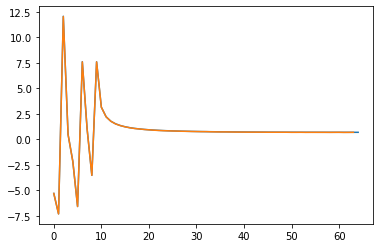

In [29]:
plt.plot(np.fft.rfft(in_data[:128]))
plt.plot(OutFFT128_q16*2**(-8))

In [25]:
Rad2_FFT_DIF_Fix16(in_data_q16, )

TypeError: Rad2_FFT_DIF_Fix16() missing 2 required positional arguments: 'Twiddles' and 'N_fft'

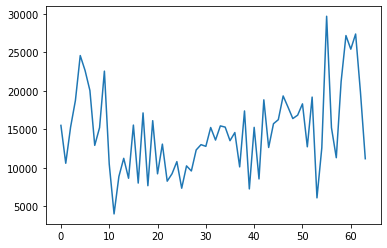

In [20]:
out_swapped_fft = np.array([
	-9486-12268j, -4480-9582j, 102+15276j, -10382+15618j, 12668-21086j, -9570-20533j, 16336-11620j, 3061-12540j, -13025-7861j, 22033-4900j, 2295-10222j, 398+3963j, 4126-7833j, 3564+10639j, -2620-8218j, 10978+11011j, -2134-7708j, 16362+5077j, -1267-7551j, 15740-3485j, -6536-6479j, 9002-9473j, 733-8212j, -237-9208j, -9951-4172j, -6820-2682j, 2364-9957j, -7089+6432j, -12270-1009j, -1062+12957j, 3100-12399j, 7581+13212j, -13336+2652j, 13648+7222j, 2686-15048j, 13450-1350j, -13110+6372j, 6988-7299j, 1078-17354j, -2069-6936j, -11719+9761j, -8535-244j, -1575-18768j, -8736+9125j, -9466+12557j, -2684+16029j, -4958-18694j, 5950+16877j, -6796+14922j, 11968+11845j, -8661-16133j, 11686+5023j, -4218+18723j, 5138+3237j, -12107-3418j, -3291-29534j, -3473-14800j, -11154+1806j, -12440+17185j, -20917-17388j, -20018+15683j, 21376-17145j, 19584-3157j, -7563-8218j, ])
plt.plot(np.abs(out_swapped_fft))